In [97]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten, LSTM
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Concatenate


import pandas as pd
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [98]:

df = pd.read_csv('C:\\Users\\Raphael\\Downloads\\TIL_NLP_train_dataset.csv')
df.head(10)

,id,word_representation,outwear,top,trousers,women dresses,women skirts
0,0,w7718 w173355 w138132 w232277 w90685 w314686 w...,1,0,1,0,0
1,1,w195317 w127737 w171593 w22890 w342007 w217871...,1,0,1,0,0
2,2,w247655 w270233 w261113 w337250 w366000 w37873...,0,1,1,0,0
3,3,w279289 w395855 w61795 w286461 w308610 w27013 ...,1,0,1,0,0
4,4,w254516 w135431 w115724 w331534 w256214 w71240...,1,0,1,0,0
5,5,w53495 w306061 w372126 w47982 w66980 w189406 w...,1,0,0,0,1
6,6,w237465 w256553 w286461 w382662 w206066 w12125...,1,0,0,1,0
7,7,w173317 w39222 w207614 w136665 w394246 w197783...,1,1,1,0,0
8,8,w373517 w37419 w358253 w162965 w286461 w204762...,1,0,0,0,0
9,9,w230409 w109269 w369689 w186076 w377961 w21787...,1,1,0,0,0


In [99]:
df_labels = df[["outwear", "top", "trousers", "women dresses", "women skirts"]]
df_labels.head()

,outwear,top,trousers,women dresses,women skirts
0,1,0,1,0,0
1,1,0,1,0,0
2,0,1,1,0,0
3,1,0,1,0,0
4,1,0,1,0,0


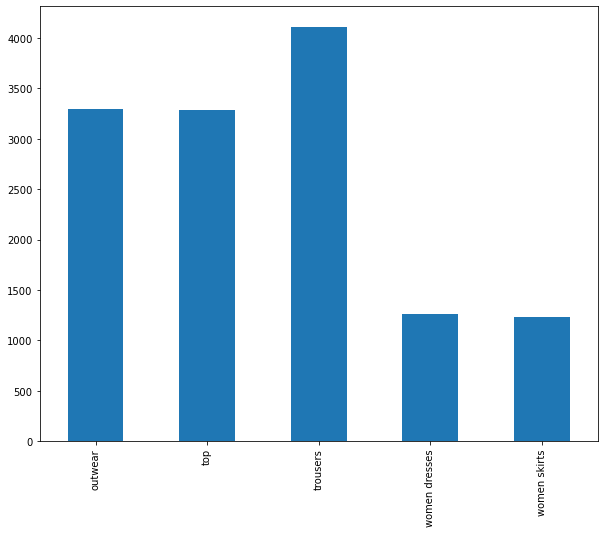

In [100]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

df_labels.sum(axis=0).plot.bar()

In [101]:
X = list(df["word_representation"])
y = df_labels.values
print(X[1])
print( type(X))
banlist=["w34894","w194870","w217871","w311583","w120979","w66980","w186076","w250138","w241910"]
mod_X = []
for sen in X:
    tmp = sen.split(" ")
    ans = [x for x in tmp if x not in banlist]
    mod_sen = (" ").join(ans)
    mod_X.append(mod_sen)

print(mod_X[1])
print(type(X[1]))

w195317 w127737 w171593 w22890 w342007 w217871 w289824 w500005 w85858 w241910 w194870 w192814 w127834 w263923 w241910
<class 'list'>
w195317 w127737 w171593 w22890 w342007 w289824 w500005 w85858 w192814 w127834 w263923
<class 'str'>


In [102]:
X_train, X_test, y_train, y_test = train_test_split(mod_X, y, test_size=0.20, random_state=42)
print(X_test[1])
#why fix num words
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1
#what is max len
maxlen = 25

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
print(X_train[5:10])
print(type(X_train[1]))

w195317 w256553 w39218 w288320 w1867 w13069 w42169 w251935 w185379 w111248 w376672 w85858 w166407 w12685
[[   5  215    1  121  170  102  194   30  690  253  728  767  205    1
  1026   15  332    8  811   48 1115  349  380   21    0]
 [  43   19  310   34    3   45  152  140  197 1244  159  188   45  324
     0    0    0    0    0    0    0    0    0    0    0]
 [  52  270   13   61   26  135  182  147  873  801   16 2083   51   15
    48    0    0    0    0    0    0    0    0    0    0]
 [ 295  109  236  375  592   14  148   36  667 1052  747   72  195  115
  1027  188    0    0    0    0    0    0    0    0    0]
 [  43  329  189   64   13   61   45  152    6  748  153  118   11   45
     0    0    0    0    0    0    0    0    0    0    0]]
<class 'numpy.ndarray'>


In [103]:
print(type(X_test))
print(type(y_train))
print(X_test[1])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[  5  19  46 836  16 662  93 535 158   4 325  40 977  22   0   0   0   0
   0   0   0   0   0   0   0]


In [104]:
from numpy import array
from numpy import asarray
from numpy import zeros
import pickle

#banlist=["w34894", "w194870", "w217871", "w311583"]
embeddings_dictionary = pd.read_pickle("word_embeddings.pkl")

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
#    if word in banlist:
#        continue
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None :
        embedding_matrix[index] = embedding_vector
print(type(embedding_matrix))

<class 'numpy.ndarray'>


In [105]:
from tensorflow.keras.layers import Bidirectional
model = Sequential()
#model.add(tensorflow.keras.Input(shape=(maxlen,)))
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False, input_shape=(maxlen,)))
model.add(Bidirectional(LSTM(132, return_sequences=False),merge_mode="concat"))
model.add(Dropout(0.2))
# model.add(Dense(units=50))
model.add(Dense(units=5))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])


In [106]:
print(model.summary())
print(type(X_test))
print(len(X_test[1]))
print(len(X))
print(X_test[1])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 25, 100)           396100    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 264)               246048    
_________________________________________________________________
dropout_4 (Dropout)          (None, 264)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 1325      
_________________________________________________________________
activation_4 (Activation)    (None, 5)                 0         
Total params: 643,473
Trainable params: 247,373
Non-trainable params: 396,100
_________________________________________________________________
None
<class 'numpy.ndarray'>
25
7380
[  5  19  46 836  16 662  93 535 158   4 325  40 977  22   0   0   0   

In [107]:
history = model.fit(X_train, y_train, batch_size=100, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
48/48 [==============================] - 2s 45ms/step - loss: 0.5442 - acc: 0.3195 - val_loss: 0.4497 - val_acc: 0.4682
Epoch 2/10
48/48 [==============================] - 2s 33ms/step - loss: 0.3824 - acc: 0.5336 - val_loss: 0.3260 - val_acc: 0.5961
Epoch 3/10
48/48 [==============================] - 2s 32ms/step - loss: 0.3000 - acc: 0.5981 - val_loss: 0.2920 - val_acc: 0.6494
Epoch 4/10
48/48 [==============================] - 2s 33ms/step - loss: 0.2565 - acc: 0.6231 - val_loss: 0.2740 - val_acc: 0.6774
Epoch 5/10
48/48 [==============================] - 2s 33ms/step - loss: 0.2264 - acc: 0.6259 - val_loss: 0.2719 - val_acc: 0.6325
Epoch 6/10
48/48 [==============================] - 2s 33ms/step - loss: 0.2128 - acc: 0.6409 - val_loss: 0.2450 - val_acc: 0.6740
Epoch 7/10
48/48 [==============================] - 2s 32ms/step - loss: 0.1886 - acc: 0.6288 - val_loss: 0.2469 - val_acc: 0.6622
Epoch 8/10
48/48 [==============================] - 2s 32ms/step - loss: 0.1757 - a

In [108]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])
#round off sigmoid values to 0 or 1?

47/47 [==============================] - 0s 6ms/step - loss: 0.2234 - acc: 0.6064
Test Score: 0.22341468930244446
Test Accuracy: 0.6063685417175293


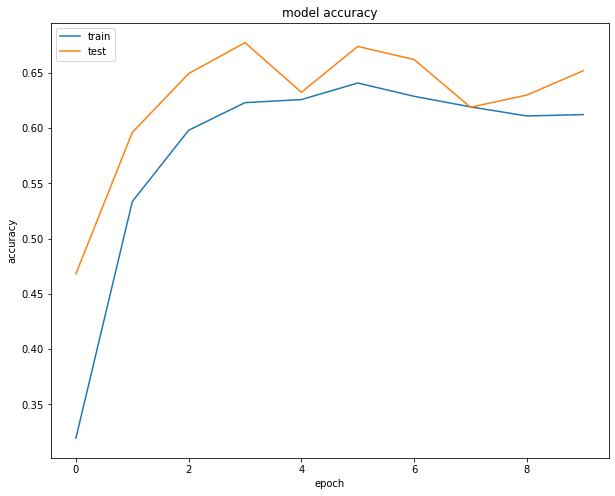

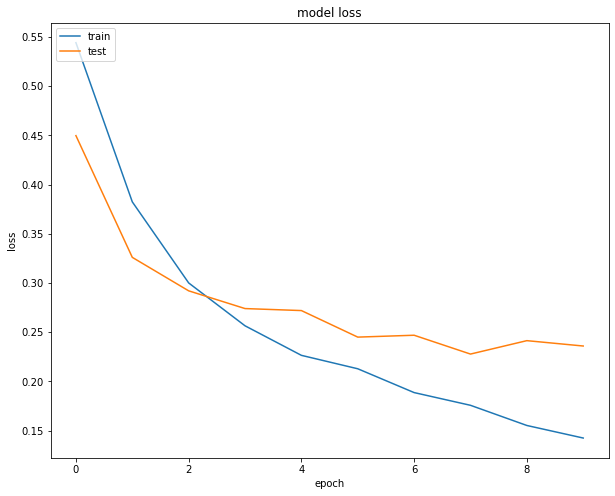

In [109]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [110]:
df_val = pd.read_csv('C:\\Users\\Raphael\\Downloads\\TIL_NLP_test_dataset.csv')
df_val.head(10)
X_val=df_val['word_representation'].values
print(type(X_val))

<class 'numpy.ndarray'>


In [111]:
print(X_val[1])
mod_X = tokenizer.texts_to_sequences(mod_X)
X_val = tokenizer.texts_to_sequences(X_val)
mod_X = pad_sequences(mod_X, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)

w237465 w167111 w279437 w194870 w351537 w175602 w209059 w118125 w120979 w150520 w59496 w34893 w189307 w144920 w187552 w239430 w162756 w255783 w342007


In [112]:
history = model.fit(mod_X, y, batch_size=160, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
33/33 [==============================] - 2s 60ms/step - loss: 0.1695 - acc: 0.6125 - val_loss: 0.1444 - val_acc: 0.5944
Epoch 2/10
33/33 [==============================] - 2s 59ms/step - loss: 0.1484 - acc: 0.5925 - val_loss: 0.1518 - val_acc: 0.6179
Epoch 3/10
33/33 [==============================] - 2s 59ms/step - loss: 0.1374 - acc: 0.5945 - val_loss: 0.1580 - val_acc: 0.5158
Epoch 4/10
33/33 [==============================] - 2s 59ms/step - loss: 0.1253 - acc: 0.5867 - val_loss: 0.1494 - val_acc: 0.5903
Epoch 5/10
33/33 [==============================] - 2s 59ms/step - loss: 0.1156 - acc: 0.5908 - val_loss: 0.1442 - val_acc: 0.6161
Epoch 6/10
33/33 [==============================] - 2s 60ms/step - loss: 0.1131 - acc: 0.5832 - val_loss: 0.1677 - val_acc: 0.5863
Epoch 7/10
33/33 [==============================] - 2s 59ms/step - loss: 0.1057 - acc: 0.5741 - val_loss: 0.1488 - val_acc: 0.5456
Epoch 8/10
33/33 [==============================] - 2s 59ms/step - loss: 0.0945 - a

In [113]:
preds_val = model.predict(X_val, verbose = 1)
preds_val[preds_val>=0.5] = 1
preds_val[preds_val<0.5] = 0

print(preds_val)
type(preds_val[1,1])

77/77 [==============================] - 0s 6ms/step
[[0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 ...
 [1. 0. 1. 0. 0.]
 [0. 1. 1. 0. 0.]
 [0. 0. 1. 0. 1.]]


numpy.float32

In [114]:
preds_val_df=pd.DataFrame(data=preds_val, columns = ["outwear","top","trousers","women dresses","women skirts"])
preds_val_df.index.name = "id"

print(preds_val_df)
preds_val_df = preds_val_df.astype(int)
preds_val_df.dtypes

      outwear  top  trousers  women dresses  women skirts
id                                                       
0         0.0  1.0       1.0            0.0           0.0
1         1.0  1.0       0.0            0.0           0.0
2         1.0  0.0       1.0            0.0           0.0
3         0.0  1.0       1.0            0.0           0.0
4         1.0  1.0       0.0            0.0           0.0
...       ...  ...       ...            ...           ...
2455      0.0  0.0       1.0            1.0           0.0
2456      1.0  0.0       1.0            0.0           0.0
2457      1.0  0.0       1.0            0.0           0.0
2458      0.0  1.0       1.0            0.0           0.0
2459      0.0  0.0       1.0            0.0           1.0

[2460 rows x 5 columns]


outwear          int32
top              int32
trousers         int32
women dresses    int32
women skirts     int32
dtype: object

In [116]:
preds_val_df.to_csv("cantstopwontstop.csv")